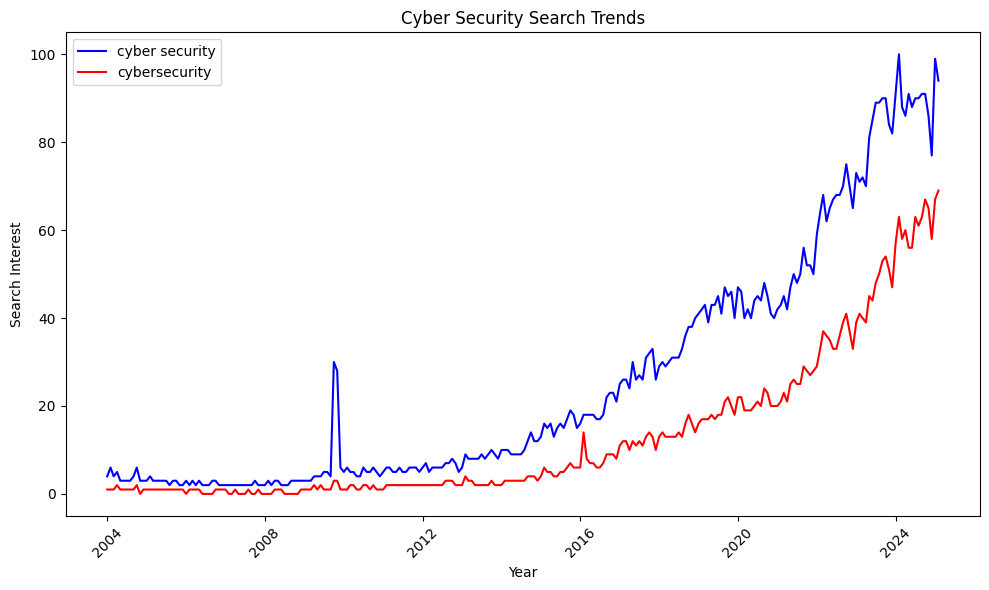

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Use os.path.join to construct the file path and get all CSV files
file_paths = ["../../dataset/requests_google/google trends.csv"]

# Check if any files were found
if not file_paths:
    print(f"No CSV files found in {file_paths}")
else:
    # Iterate over each file
    i=0
    for file_path in file_paths:
        # Read the first line to extract the category
        with open(file_path, 'r', encoding='utf-8') as f:
            category_line = f.readline().strip()

        # Extract the category name from the first line
        category = category_line.split(': ')[1] if ': ' in category_line else 'Unknown Category'

        # Load the CSV data, skipping the first line (category line)
        df = pd.read_csv(file_path, skiprows=1)

        # Convert 'Mois' column to datetime format for proper plotting
        df['Mois'] = pd.to_datetime(df['Mois'], format='%Y-%m')

        # Dynamically extract the column names (headers)
        date_column = df.columns[0]  # First column is the date column ('Mois')
        search_term_1 = df.columns[1]  # Second column (e.g., 'what is cyber security')
        search_term_2 = df.columns[2]  # Third column (e.g., 'cyber security definition')

        if i == 1 or i == 0:
            # Plot the data for the current file
            plt.figure(figsize=(10,6))
            plt.plot(df[date_column], df[search_term_1], label=search_term_1, color='blue')
            plt.plot(df[date_column], df[search_term_2], label=search_term_2, color='red')
            #plt.plot(df[date_column], df[term3], label=term3)


            # Add titles and labels
            plt.title(f'Cyber Security Search Trends')
            plt.xlabel('Year')
            plt.ylabel('Search Interest')
            plt.legend()

            # Display the plot
            plt.xticks(rotation=45)
            plt.tight_layout()

            # Save each plot as a separate image (optional)
            #plt.savefig(f"{category.replace(' ', '_')}_search_trends.png")

            # Show the plot
            plt.show()
        i+=1
